In [50]:
!pip install pywaffle
!pip install pgn2data
!pip install proplot
!pip install --upgrade ipython


In [51]:
from converter.pgn_data import PGNData
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib as mpl
import proplot as pplt


In [52]:
# requests.get('https://lichess.org/api/games/user/canijustlose')

In [53]:
username = "canijustlose"
pgn_data = PGNData("lichess_canijustlose_2024-01-18.pgn")
pgn_data.export(moves_required=False)

In [54]:
games = pd.read_csv('lichess_canijustlose_2024-01-18_game_info.csv', encoding="latin1")
eco = pd.read_csv('eco_codes.csv', encoding="latin1")
games = games.drop(columns=['game_id', 'site', 'round', 'game_order', 'white_rating_diff', 'black_rating_diff', 'winner_elo', 'loser_elo', 'winner_loser_elo_diff',
                            'termination', 'time_control', 'variant', 'ply_count', 'date_created', 'file_name'])


In [55]:
# my_file = 'lichess_canijustlose_2024-01-18_game_info.csv'
# df = pd.read_csv(my_file)

In [56]:
games.head()

,event,date_played,white,black,result,white_elo,black_elo,white_title,black_title,winner,loser,eco,utc_date,utc_time
0,Rated Blitz game,2024.01.17,canijustlose,gastongut,0-1,1668,1617,NaN,NaN,gastongut,canijustlose,C50,2024.01.17,04:42:37
1,Rated Blitz game,2024.01.16,canijustlose,Mangeni,0-1,1674,1715,NaN,NaN,Mangeni,canijustlose,C50,2024.01.16,19:16:02
2,Rated Blitz game,2024.01.16,xavgarriga,canijustlose,1-0,1695,1682,NaN,NaN,xavgarriga,canijustlose,C20,2024.01.16,19:11:53
3,Rated Blitz game,2024.01.16,canijustlose,Thugga,0-1,1690,1650,NaN,NaN,Thugga,canijustlose,C41,2024.01.16,06:50:03
4,Rated Blitz game,2024.01.16,Tomoe91,canijustlose,0-1,1694,1682,NaN,NaN,canijustlose,Tomoe91,A40,2024.01.16,05:52:54


In [57]:
#making new column with the results
# games['group_name_result'] = games['winner'].apply(lambda x: 'won' if x == username else ('lost' if x != username else 'draw'))
games['group_name_result'] = games['winner'].apply(
    lambda x: 'won' if x == username else ('draw' if x == 'draw' else 'lost'))
games = games.assign(group_name_result = games['group_name_result'])


In [58]:
games['group_name_color'] = games['white'].apply(
    lambda x: 'white' if x == username else 'black')
games = games.assign(group_name_color = games['group_name_color'])

In [59]:
games.head(17)

,event,date_played,white,black,result,white_elo,black_elo,white_title,black_title,winner,loser,eco,utc_date,utc_time,group_name_result,group_name_color
0,Rated Blitz game,2024.01.17,canijustlose,gastongut,0-1,1668,1617,NaN,NaN,gastongut,canijustlose,C50,2024.01.17,04:42:37,lost,white
1,Rated Blitz game,2024.01.16,canijustlose,Mangeni,0-1,1674,1715,NaN,NaN,Mangeni,canijustlose,C50,2024.01.16,19:16:02,lost,white
2,Rated Blitz game,2024.01.16,xavgarriga,canijustlose,1-0,1695,1682,NaN,NaN,xavgarriga,canijustlose,C20,2024.01.16,19:11:53,lost,black
3,Rated Blitz game,2024.01.16,canijustlose,Thugga,0-1,1690,1650,NaN,NaN,Thugga,canijustlose,C41,2024.01.16,06:50:03,lost,white
4,Rated Blitz game,2024.01.16,Tomoe91,canijustlose,0-1,1694,1682,NaN,NaN,canijustlose,Tomoe91,A40,2024.01.16,05:52:54,won,black
5,Rated Blitz game,2024.01.16,salimkh7,canijustlose,0-1,1674,1674,NaN,NaN,canijustlose,salimkh7,A40,2024.01.16,05:52:05,won,black
6,Rated Blitz game,2024.01.16,Whylou,canijustlose,0-1,1656,1666,NaN,NaN,canijustlose,Whylou,A40,2024.01.16,05:50:53,won,black
7,Rated Blitz game,2024.01.16,canijustlose,Ol11,0-1,1673,1721,NaN,NaN,Ol11,canijustlose,A06,2024.01.16,05:44:34,lost,white
8,Rated Blitz game,2024.01.15,Vyrant2117,canijustlose,1-0,1652,1683,NaN,NaN,Vyrant2117,canijustlose,A45,2024.01.15,05:35:15,lost,black
9,Rated Blitz game,2024.01.15,canijustlose,KBSBR,0-1,1691,1703,NaN,NaN,KBSBR,canijustlose,B00,2024.01.15,05:30:40,lost,white


In [60]:
# Results
games_count = games['group_name_result'].value_counts()   # Counting wins-losses-draws
games_count = games_count.to_frame().reset_index()        # Convert series to dataframe
games_count.columns = ['result', 'count']                 # Rename column names
print(games_count)

  result  count
0    won    271
1   lost    212
2   draw     19


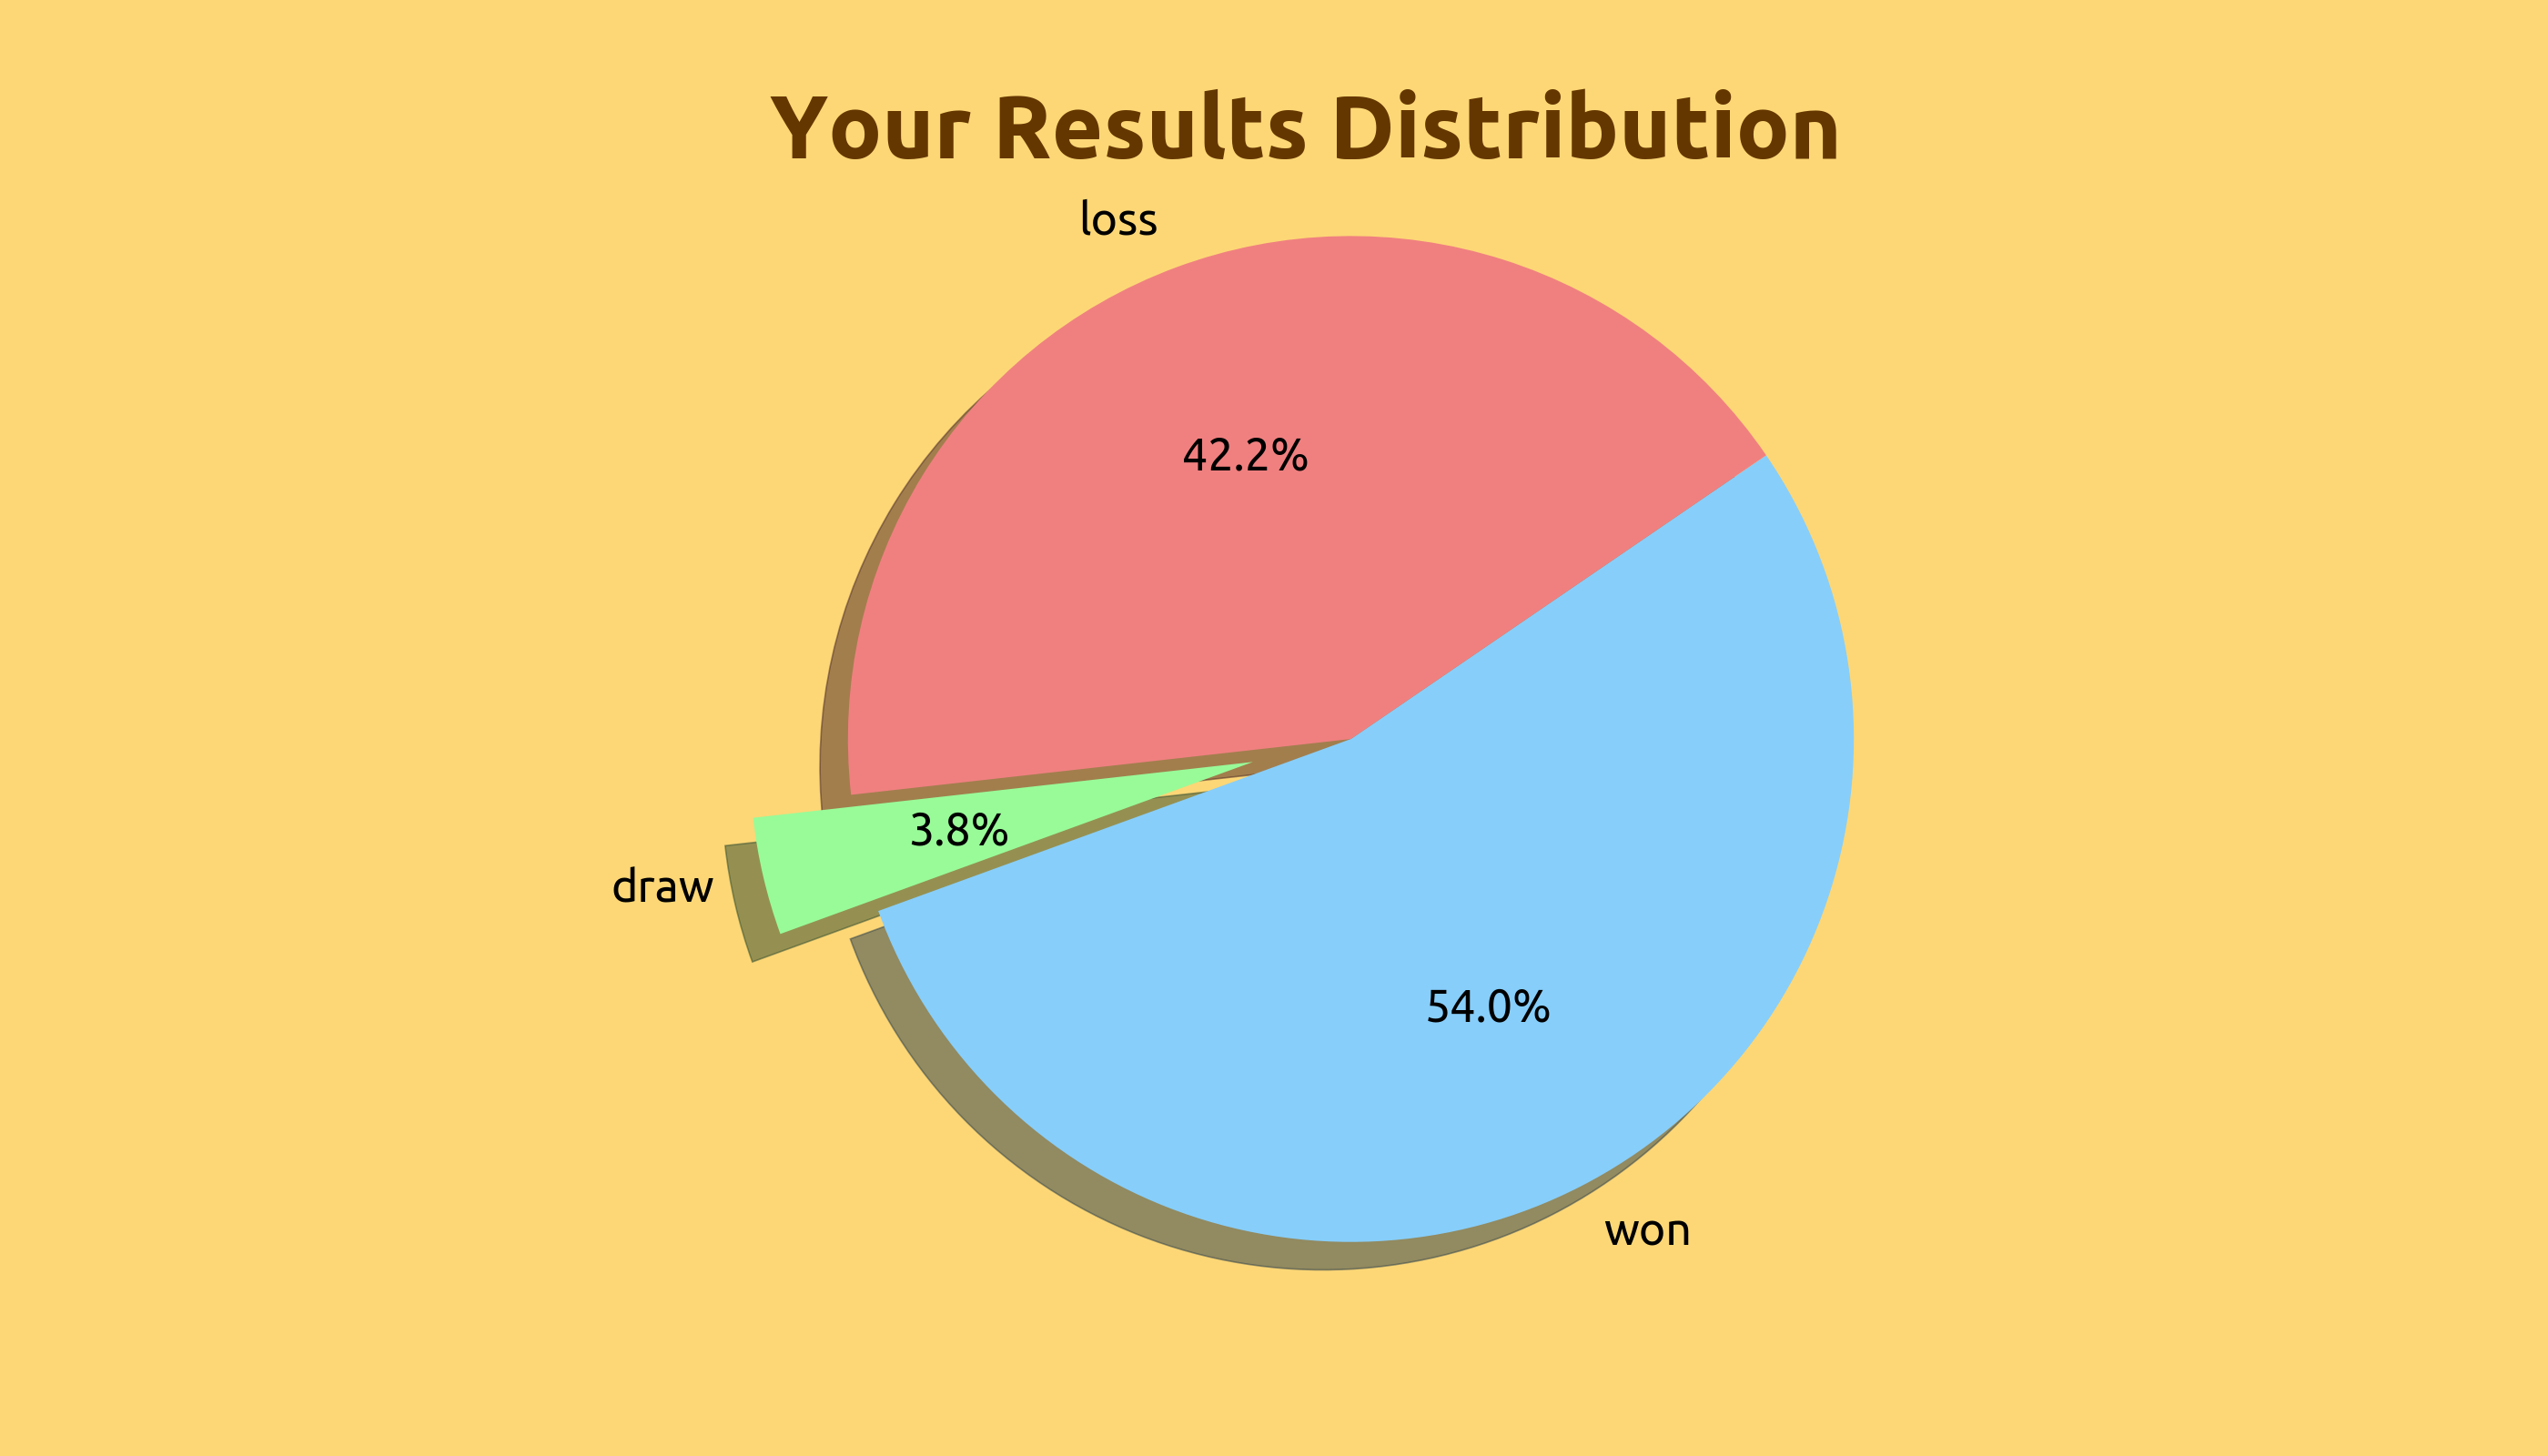

In [61]:
# Visualization
fig = plt.figure(figsize=(14,8))
fig.patch.set_facecolor('#FDD776')

mpl.rcParams['font.size'] = 18
mpl.rcParams['font.family'] = 'Ubuntu'

plt.pie(games_count['count'],
        explode=(0, 0, 0.2),
        labels=['won', 'loss', 'draw'],
        colors= ['lightskyblue', 'lightcoral', 'palegreen'],
        autopct='%1.1f%%',
        shadow=True,
        startangle=200)

plt.axis('equal')
plt.title('Your Results Distribution', fontsize=35, fontweight="bold", color = 'brown')
plt.show()

In [62]:
games_color = games.groupby(['group_name_color','group_name_result']).size().reset_index(name='counts')   # Counting
# games_color = games_color.pivot(index="group_name_color",columns = "group_name_result",values="counts")   # Pivoting df

<ipython-input-63-5aabaf4fd33f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_eco['total'] = win_eco.groupby(['group_name_color', 'eco_name'])['counts'].transform('sum')


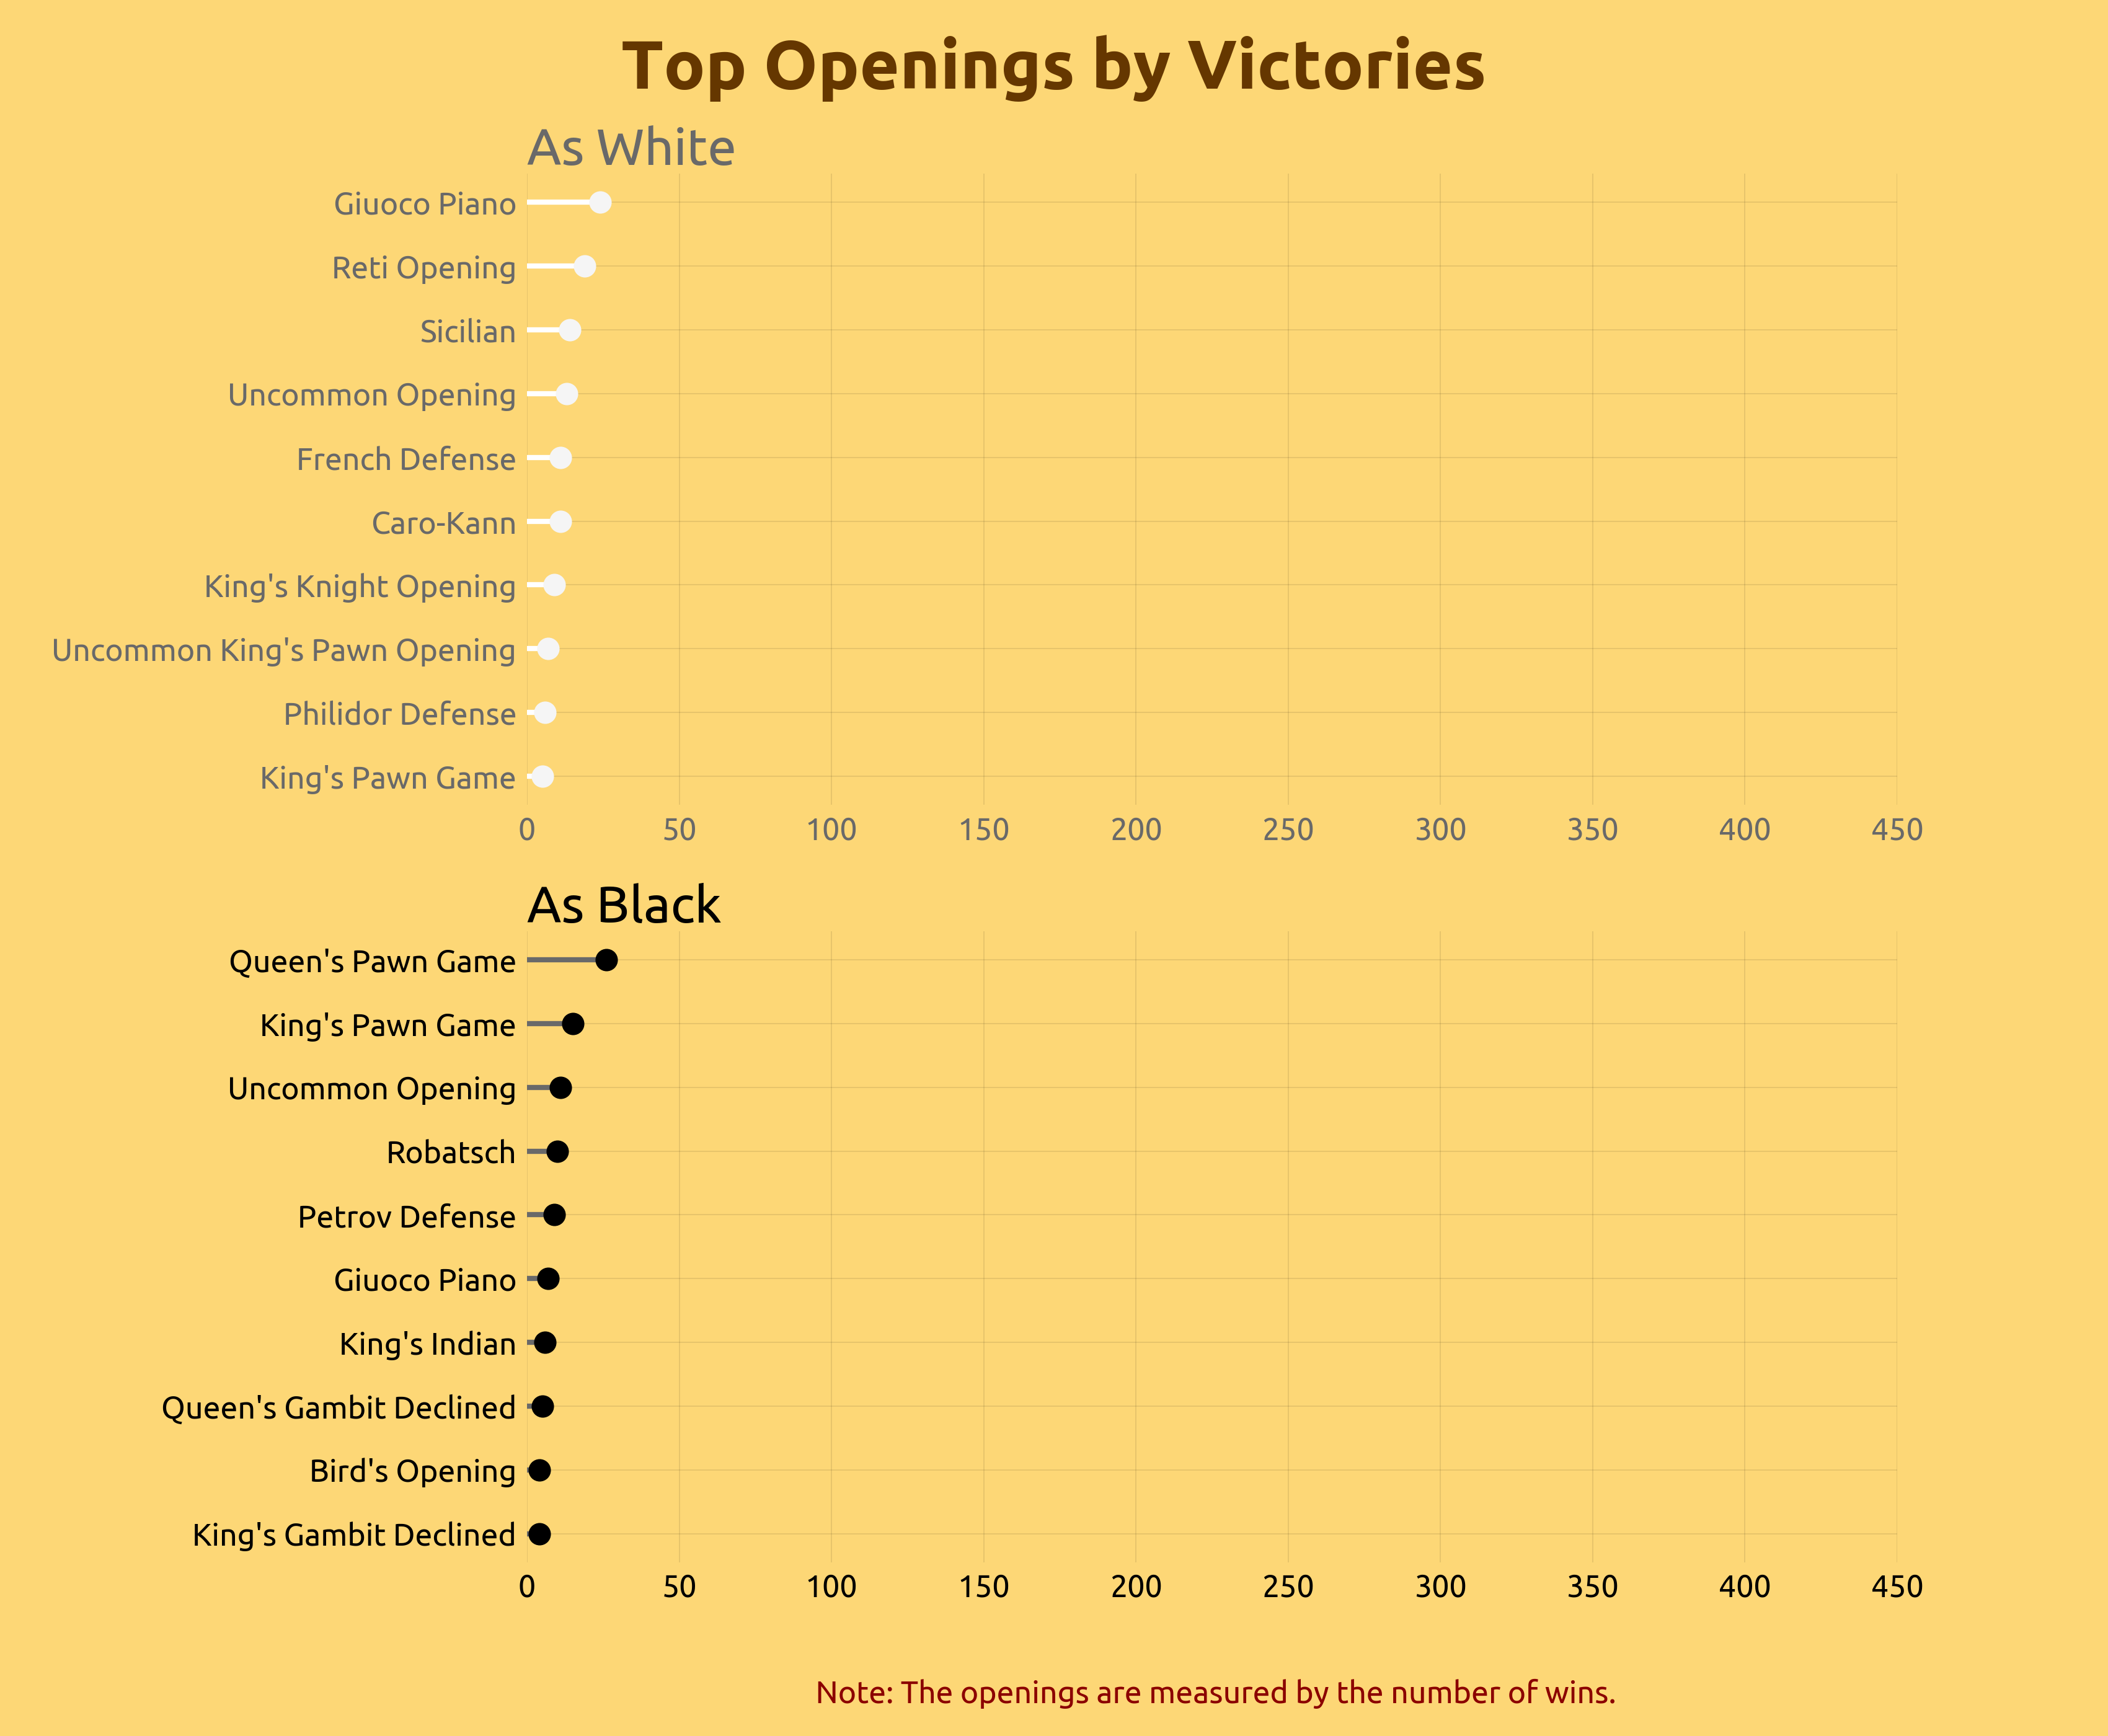

In [63]:

games_eco = games.groupby(['group_name_result','group_name_color','eco']).size().reset_index(name='counts')
games_eco = games_eco.merge(eco, on='eco', how = 'inner')
win_eco = games_eco.loc[games_eco['group_name_result'] == 'won']
win_eco['total'] = win_eco.groupby(['group_name_color', 'eco_name'])['counts'].transform('sum')
win_eco = win_eco.drop_duplicates(subset=['group_name_color', 'eco_name'])
win_eco_white = win_eco.loc[win_eco['group_name_color'] == 'white'].sort_values('total', ascending = False).head(10).sort_values('total', ascending = True)
win_eco_black = win_eco.loc[win_eco['group_name_color'] == 'black'].sort_values('total', ascending = False).head(10).sort_values('total', ascending = True)

fig, axs = plt.subplots(2, figsize =(17, 14))

axs[0].hlines(y = win_eco_white.eco_name,
           xmin = 0,
           xmax = win_eco_white.total,
           color = 'white',
           linewidth=3)

axs[0].plot(win_eco_white.total, win_eco_white.eco_name, 'o', markersize=12, color = 'whitesmoke')
axs[1].hlines(y = win_eco_black.eco_name,
               xmin = 0,
               xmax = win_eco_black.total,
               color = 'dimgray',
               linewidth=3)

axs[1].plot(win_eco_black.total, win_eco_black.eco_name, 'o', markersize=12, color = 'black')

# Remove ticks
axs[0].xaxis.set_ticks_position('none')
axs[0].yaxis.set_ticks_position('none')
axs[1].xaxis.set_ticks_position('none')
axs[1].yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    axs[0].spines[i].set_visible(False)
for i in ['top', 'bottom', 'left', 'right']:
    axs[1].spines[i].set_visible(False)
    # Setting the values for all axes.
plt.setp(axs, xlim=(0,450))

axs[0].set_title('As White', fontsize=30, color = 'dimgray', loc = 'left');
axs[1].set_title('As Black', fontsize=30, loc = 'left');

axs[0].tick_params(axis='x', colors='dimgray')
axs[0].tick_params(axis='y', colors='dimgray')

plt.subplots_adjust(left=0.25, right=0.9, top=0.9, bottom=0.1)

fig.patch.set_facecolor('#FDD776')
axs[0].set_facecolor('#FDD776')
axs[1].set_facecolor('#FDD776')

axs[1].set_xlabel('\n\n Note: The openings are measured by the number of wins.', color = 'darkred');
plt.suptitle('Top Openings by Victories', fontsize=40, color = 'brown');

In [63]:

games_eco = games.groupby(['group_name_result','group_name_color','eco']).size().reset_index(name='counts')
games_eco = games_eco.merge(eco, on='eco', how = 'inner')
win_eco = games_eco.loc[games_eco['group_name_result'] == 'won']
win_eco['total'] = win_eco.groupby(['group_name_color', 'eco_name'])['counts'].transform('sum')
win_eco = win_eco.drop_duplicates(subset=['group_name_color', 'eco_name'])
win_eco_white = win_eco.loc[win_eco['group_name_color'] == 'white'].sort_values('total', ascending = False).head(10).sort_values('total', ascending = True)
win_eco_black = win_eco.loc[win_eco['group_name_color'] == 'black'].sort_values('total', ascending = False).head(10).sort_values('total', ascending = True)

fig, axs = plt.subplots(2, figsize =(17, 14))

axs[0].hlines(y = win_eco_white.eco_name,
           xmin = 0,
           xmax = win_eco_white.total,
           color = 'white',
           linewidth=3)

axs[0].plot(win_eco_white.total, win_eco_white.eco_name, 'o', markersize=12, color = 'whitesmoke')
axs[1].hlines(y = win_eco_black.eco_name,
               xmin = 0,
               xmax = win_eco_black.total,
               color = 'dimgray',
               linewidth=3)

axs[1].plot(win_eco_black.total, win_eco_black.eco_name, 'o', markersize=12, color = 'black')

# Remove ticks
axs[0].xaxis.set_ticks_position('none')
axs[0].yaxis.set_ticks_position('none')
axs[1].xaxis.set_ticks_position('none')
axs[1].yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    axs[0].spines[i].set_visible(False)
for i in ['top', 'bottom', 'left', 'right']:
    axs[1].spines[i].set_visible(False)
    # Setting the values for all axes.
plt.setp(axs, xlim=(0,450))

axs[0].set_title('As White', fontsize=30, color = 'dimgray', loc = 'left');
axs[1].set_title('As Black', fontsize=30, loc = 'left');

axs[0].tick_params(axis='x', colors='dimgray')
axs[0].tick_params(axis='y', colors='dimgray')

plt.subplots_adjust(left=0.25, right=0.9, top=0.9, bottom=0.1)

fig.patch.set_facecolor('#FDD776')
axs[0].set_facecolor('#FDD776')
axs[1].set_facecolor('#FDD776')

axs[1].set_xlabel('\n\n Note: The openings are measured by the number of wins.', color = 'darkred');
plt.suptitle('Top Openings by Victories', fontsize=40, color = 'brown');